In [75]:
# Dependencies
import requests
import json
import pandas as pd
import matplotlib as plt

In [76]:
# URL for GET requests to retrieve Game of Throne character data
base_url = "https://anapioficeandfire.com/api/characters/"

In [77]:
# Create a url with a specific character id
character_id = '583'
url = base_url + character_id
print(url)

https://anapioficeandfire.com/api/characters/583


In [78]:
# Perform a get request for this character
response = requests.get(url)
print(response.url)

https://anapioficeandfire.com/api/characters/583


In [79]:
# Storing the JSON response within a variable
data = response.json()
# Use json.dumps to print the json
print(json.dumps(data, indent=4, sort_keys=True))

{
    "aliases": [
        "Lord Snow",
        "Ned Stark's Bastard",
        "The Snow of Winterfell",
        "The Crow-Come-Over",
        "The 998th Lord Commander of the Night's Watch",
        "The Bastard of Winterfell",
        "The Black Bastard of the Wall",
        "Lord Crow"
    ],
    "allegiances": [
        "https://anapioficeandfire.com/api/houses/362"
    ],
    "books": [
        "https://anapioficeandfire.com/api/books/5"
    ],
    "born": "In 283 AC",
    "culture": "Northmen",
    "died": "",
    "father": "",
    "gender": "Male",
    "mother": "",
    "name": "Jon Snow",
    "playedBy": [
        "Kit Harington"
    ],
    "povBooks": [
        "https://anapioficeandfire.com/api/books/1",
        "https://anapioficeandfire.com/api/books/2",
        "https://anapioficeandfire.com/api/books/3",
        "https://anapioficeandfire.com/api/books/8"
    ],
    "spouse": "",
    "titles": [
        "Lord Commander of the Night's Watch"
    ],
    "tvSeries": [
      

In [80]:
for key in data.keys():
    print(key)

url
name
gender
culture
born
died
titles
aliases
father
mother
spouse
allegiances
books
povBooks
tvSeries
playedBy


In [81]:
# Print the name of the character retrieved
character_name = data["name"]
print(character_name)

Jon Snow


In [82]:
# Print the number of GOT tv series that they were in (hint: use len())
tv_series_number = len(data["tvSeries"])
print(tv_series_number)

6


In [83]:
# Request the Books URI found in the povBooks property of the
# previously retreived json, then use the response to figure out what this 
# character second book appearance was
first_allegiance_url = data["allegiances"][0]
allegiance_response = requests.get(first_allegiance_url ).json()
allegiance_response

{'url': 'https://anapioficeandfire.com/api/houses/362',
 'name': 'House Stark of Winterfell',
 'region': 'The North',
 'coatOfArms': 'A running grey direwolf, on an ice-white field',
 'words': 'Winter is Coming',
 'titles': ['King in the North',
  'Lord of Winterfell',
  'Warden of the North',
  'King of the Trident'],
 'seats': ['Scattered (formerly Winterfell)'],
 'currentLord': '',
 'heir': '',
 'overlord': 'https://anapioficeandfire.com/api/houses/16',
 'founded': 'Age of Heroes',
 'founder': 'https://anapioficeandfire.com/api/characters/209',
 'diedOut': '',
 'ancestralWeapons': ['Ice'],
 'cadetBranches': ['https://anapioficeandfire.com/api/houses/170',
  'https://anapioficeandfire.com/api/houses/215'],
 'swornMembers': ['https://anapioficeandfire.com/api/characters/2',
  'https://anapioficeandfire.com/api/characters/20',
  'https://anapioficeandfire.com/api/characters/97',
  'https://anapioficeandfire.com/api/characters/98',
  'https://anapioficeandfire.com/api/characters/136',
 

In [84]:
# Print the description of the coat of arms of the second allegiance
coat_of_arms = allegiance_response["coatOfArms"]
print(f"Their coat of arms description: {coat_of_arms}")

Their coat of arms description: A running grey direwolf, on an ice-white field


In [85]:
# BONUS
branches = []

for branch in allegiance_response['cadetBranches']:
    cur_branch = requests.get(branch).json()
    branch_name = cur_branch["name"]
    branches.append(branch_name)
    
print(f"{character_name}'s allegiance cadet branches are:")
print(branches)

Jon Snow's allegiance cadet branches are:
["House Greystark of Wolf's Den", 'House Karstark of Karhold']


In [86]:
branches_df = pd.DataFrame({"houses":branches,"number of members":(12,36)})


In [87]:
branches_df.set_index('houses', inplace=True)

<Axes: title={'center': 'number of members by house'}, xlabel='houses', ylabel='quantity of members'>

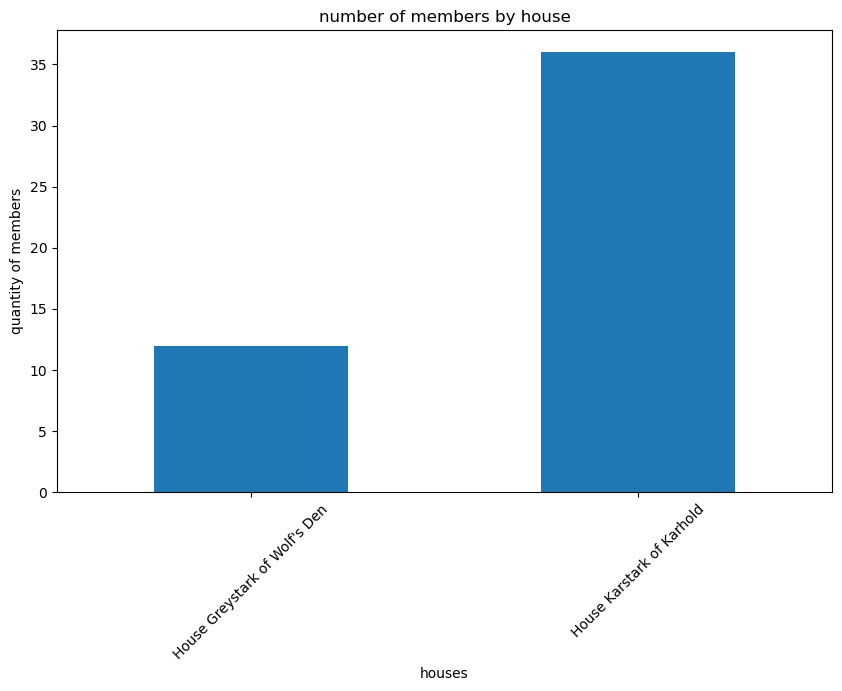

In [94]:
branches_df['number of members'].plot(kind='bar', 
                                      figsize=(10,6), ylabel= "quantity of members", 
                                      title = "number of members by house", rot = 45)
